In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import time

In [21]:
start = time.time()
df=pd.read_pickle("../data/datasets/ALE/Kangaroo_dqn_agent_rgb.pkl.gz", compression="gzip")
end = time.time()
print(f"Loading RGB dataframe: in {end - start:.2f}s")
start = time.time()
df_dqn=pd.read_pickle("../data/datasets/ALE/Kangaroo_dqn_agent_dqn.pkl.gz", compression="gzip")
end = time.time()
print(f"Loading DQN dataframe: in {end - start:.2f}s")

Loading RGB dataframe: in 4.6 s
Loading DQN dataframe: in 2.9 s


In [4]:
df.columns

Index(['index', 'obs', 'next_obs', 'objects', 'next_objects', 'action',
       'reward', 'original_reward', 'done'],
      dtype='object')

1000 [Platform at (16, 172), (128, 4), Platform at (16, 28), (128, 4), Platform at (16, 76), (128, 4), Platform at (16, 124), (128, 4), Player at (42, 100), (8, 24), Fruit at (59, 60), (7, 11), Fruit at (39, 84), (7, 11), Life at (16, 183), (4, 7), Life at (24, 183), (4, 7), Time at (80, 191), (15, 5), Bell at (93, 36), (6, 11), Ladder at (132, 132), (8, 36), Ladder at (20, 84), (8, 36), Ladder at (132, 36), (8, 36), Child at (113, 12), (8, 15), Monkey at (152, 1029), (6, 15), Monkey at (152, 1029), (6, 15), Monkey at (152, 1029), (6, 15)]
1020 [Platform at (16, 172), (128, 4), Platform at (16, 28), (128, 4), Platform at (16, 76), (128, 4), Platform at (16, 124), (128, 4), Player at (43, 52), (8, 24), Fruit at (59, 60), (7, 11), Fruit at (39, 84), (7, 11), Life at (16, 183), (4, 7), Life at (24, 183), (4, 7), Time at (80, 191), (15, 5), Bell at (93, 36), (6, 11), Ladder at (132, 132), (8, 36), Ladder at (20, 84), (8, 36), Ladder at (132, 36), (8, 36), Child at (129, 12), (8, 15)]
1040 

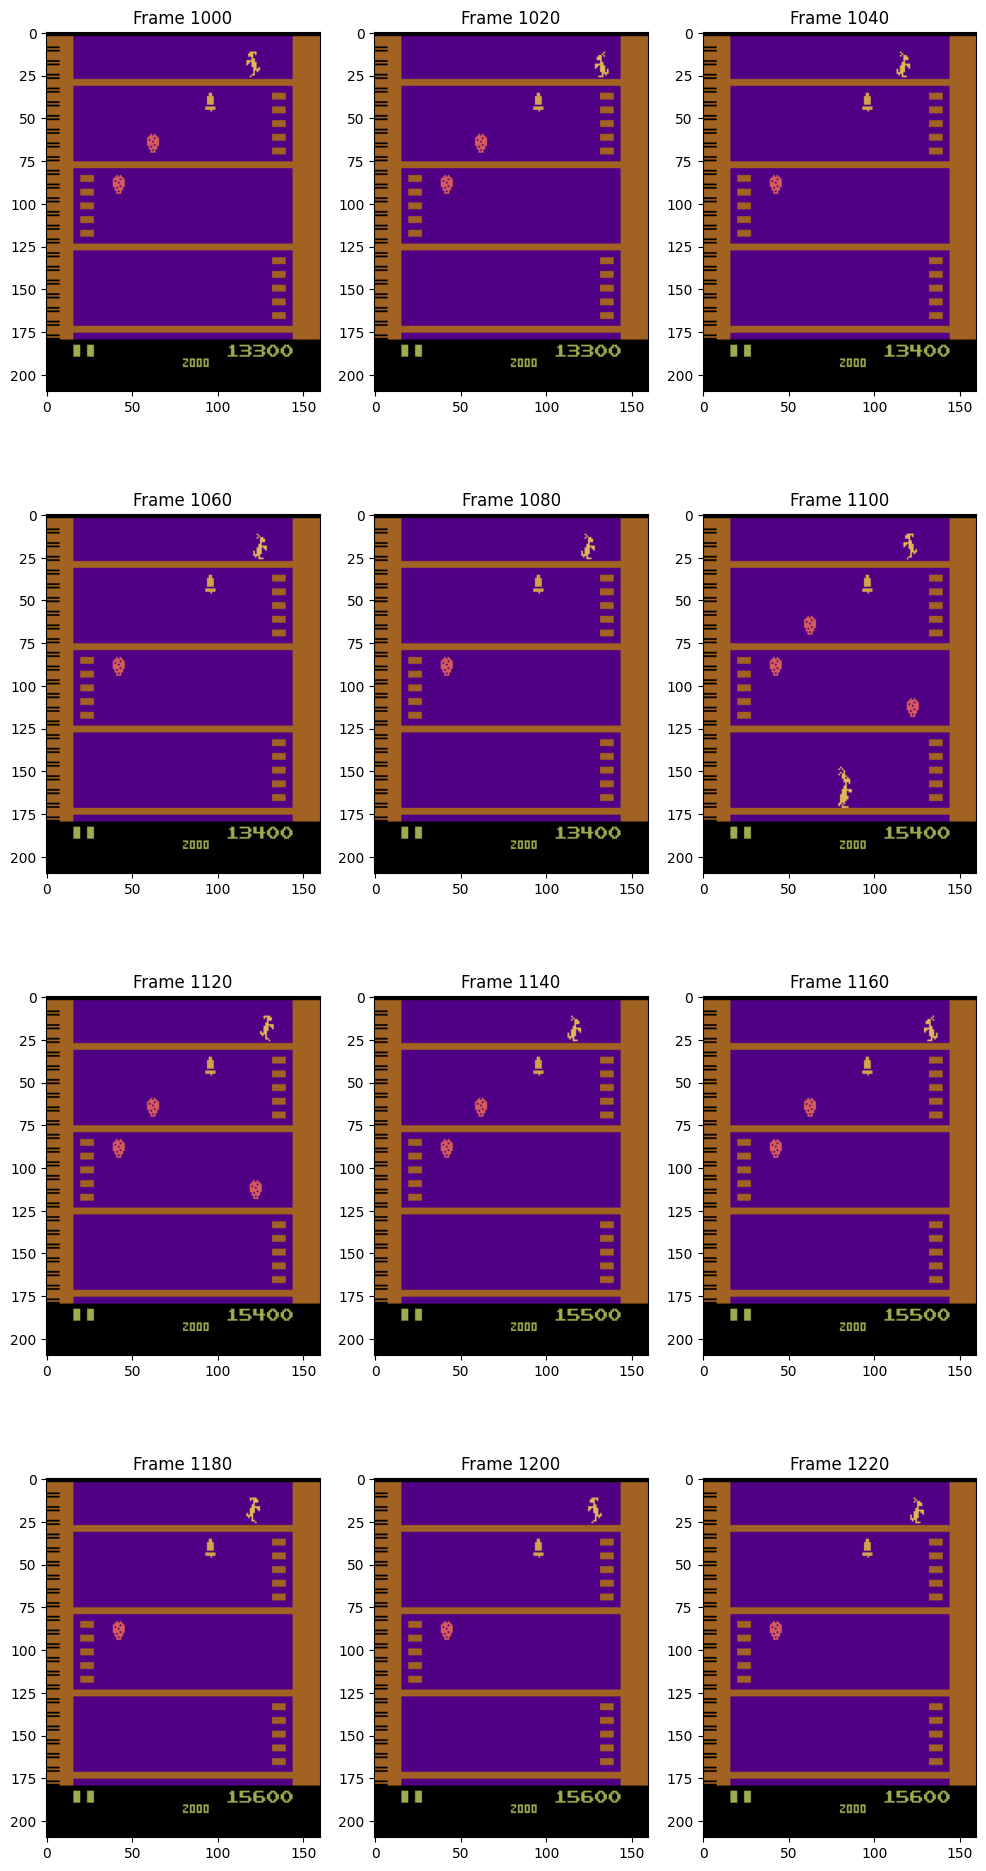

In [29]:
grid = (4, 3)
fig, axes = plt.subplots(*grid, figsize=(4*grid[1], 6*grid[0]))
for i, ax in enumerate(axes.flatten()):
    array = df["obs"][1000+20*i].cpu().numpy()
    ax.imshow(array.astype(np.uint8))
    ax.set_title(f'Frame {1000+20*i}')
    print("Frame ", 1000+20*i, ":", df["objects"][1000+20*i])

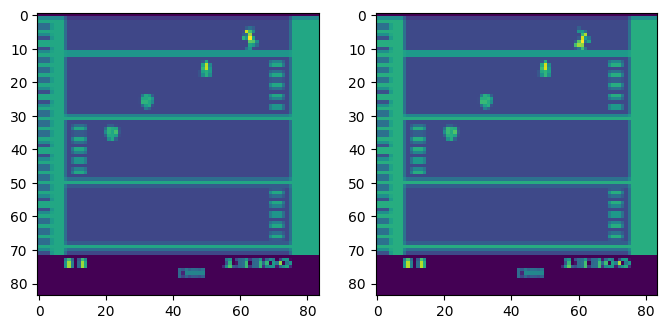

In [17]:
grid = (1, 2)
fig, axes = plt.subplots(*grid, figsize=(4*grid[1], 6*grid[0]))
for i, ax in enumerate(axes.flatten()):
    array = df_dqn["obs_dqn"][1000+1*i].cpu().numpy()
    ax.imshow(array.astype(np.uint8)[-1])

In [ ]:
df["objects"][1000]

In [ ]:
df["action"][1000]

In [ ]:
df["reward"][1000]


In [ ]:
df["original_reward"][1000]


In [ ]:
df["done"][1000]